In [ ]:
import requests
import pandas as pd
import geopandas as gpd
import os
import zipfile
import shapely
import matplotlib.pyplot as plt

import functions as fun

import warnings
warnings.simplefilter("ignore")

# Carta risorse idriche
Source: https://www.provincia.tn.it/Documenti-e-dati/Documenti-di-supporto/Download-shapefile-Carta-delle-Risorse-idriche

In [ ]:
cri_url = 'https://www.provincia.tn.it/content/download/97556/1838192/file/CRI_shapefile.zip'
cri_path = '../data/water/carta_ris_idriche/'
fun.download_and_unzip_shapefile(cri_url, extract_to=cri_path)

Downloaded and extracted shapefile in ../data/water/carta_ris_idriche/


Contains several zip folders with shapefiles for the different types of resources (listed in **leggi.txt**).
I start from looking at PUP_AS (acque superficiali), PUP_SO (sorgenti), PUP_PO (pozzi).

In [19]:
os.listdir(cri_path)

['pup_as',
 'pup_so.zip',
 'pup_si.zip',
 'pup_asu.zip',
 'pup_sor.zip',
 'pup_pp.zip',
 'pup_ai.zip',
 'pup_ap.zip',
 'pup_poz.zip',
 'pup_as.zip',
 'pup_sp.zip',
 'pup_pi.zip',
 'pup_po.zip',
 'leggi.txt']

In [ ]:
for zip in ['pup_as.zip', 'pup_so.zip', 'pup_po.zip']:
    path = cri_path + zip
    dest = cri_path + zip.split('.')[0] + '/' 
    fun.download_and_unzip_shapefile(path, dest, download=False)

Downloaded and extracted shapefile in ../data/water/carta_ris_idriche/pup_as/
Downloaded and extracted shapefile in ../data/water/carta_ris_idriche/pup_so/
Downloaded and extracted shapefile in ../data/water/carta_ris_idriche/pup_po/


In [48]:
# Acque superficiali
pup_as = gpd.read_file('../data/water/carta_ris_idriche/pup_as/pup_as.shp')
pup_as.head(5)


,CODAS,DENOMINAZI,X_COORD,Y_COORD,geometry
0,Q143001,LAGO SERODOLI,637235.7659,5.123018e+06,POINT (637235.766 5123018.104)
1,Q920002,RIO MASSO' O VAL DELLE SEGHE (ALTA 1),649043.4944,5.115833e+06,POINT (649043.494 5115833.139)
2,Q009001,RIO DI BRUSAGO,681664.9133,5.116879e+06,POINT (681664.913 5116878.856)
3,Q920003,RIO MASSO' O VAL DELLE SEGHE (ALTA 2),649088.3931,5.115788e+06,POINT (649088.393 5115788.227)
4,Q920001,RIO MASSO' O VAL DELLE SEGHE (BASSA),648393.3936,5.115261e+06,POINT (648393.394 5115261.294)


In [49]:
# Sorgenti
pup_so = gpd.read_file('../data/water/carta_ris_idriche/pup_so/pup_so.shp')
pup_so.head(5)

,CODSOR,COORD_X,COORD_Y,geometry
0,3218.0,725912.00,5119184.0,POINT (725912 5119184)
1,3219.0,725993.00,5119248.0,POINT (725993 5119248)
2,628.0,671334.00,5107963.0,POINT (671334 5107963)
3,629.0,671402.03,5108045.1,POINT (671402.03 5108045.1)
4,630.0,671427.03,5108021.1,POINT (671427.03 5108021.1)


In [50]:
# Pozzi
pup_po = gpd.read_file('../data/water/carta_ris_idriche/pup_po/pup_po.shp')
pup_po.head(5)

,PCOD,DENOMINAZI,X_COORD,Y_COORD,geometry
0,6766,OSPEDALETTO,697149.0,5102200.0,POINT (697149 5102200)
1,20555,SERVIS,659744.0,5089931.0,POINT (659744 5089931)
2,4880,LOCALITA' POZZE,653277.0,5086286.0,POINT (653277 5086286)
3,199,BOSCO,667621.0,5108673.0,POINT (667621 5108673)
4,23294,FONTANELLE,679381.0,5096489.0,POINT (679381 5096489)


In [36]:
print('Number of features in Acque Superficiali:', len(pup_as))
print('Number of features in Sorgenti:', len(pup_so))
print('Number of features in Pozzi:', len(pup_po))

Number of features in Acque Superficiali: 32
Number of features in Sorgenti: 1871
Number of features in Pozzi: 153


Store them in a single gdf, adding a column 'type' to differentiate them

In [51]:
# Standardize the column names and add 'type' column
pup_as = pup_as.rename(columns={'CODAS': 'id_code', 'DENOMINAZI': 'name'})
pup_as['type'] = 'acqua_superficiale'

pup_so = pup_so.rename(columns={'CODSOR': 'id_code'})
pup_so['type'] = 'sorgente'

pup_po = pup_po.rename(columns={'PCOD': 'id_code', 'DENOMINAZI': 'name'})
pup_po['type'] = 'pozzo'

# Concatenate 
pup_all = gpd.GeoDataFrame(pd.concat([pup_as, pup_so, pup_po], ignore_index=True))
pup_all = pup_all[['id_code', 'type', 'name', 'geometry' ]]

pup_all.head(5)

,id_code,type,name,geometry
0,Q143001,acqua_superficiale,LAGO SERODOLI,POINT (637235.766 5123018.104)
1,Q920002,acqua_superficiale,RIO MASSO' O VAL DELLE SEGHE (ALTA 1),POINT (649043.494 5115833.139)
2,Q009001,acqua_superficiale,RIO DI BRUSAGO,POINT (681664.913 5116878.856)
3,Q920003,acqua_superficiale,RIO MASSO' O VAL DELLE SEGHE (ALTA 2),POINT (649088.393 5115788.227)
4,Q920001,acqua_superficiale,RIO MASSO' O VAL DELLE SEGHE (BASSA),POINT (648393.394 5115261.294)


<Axes: >

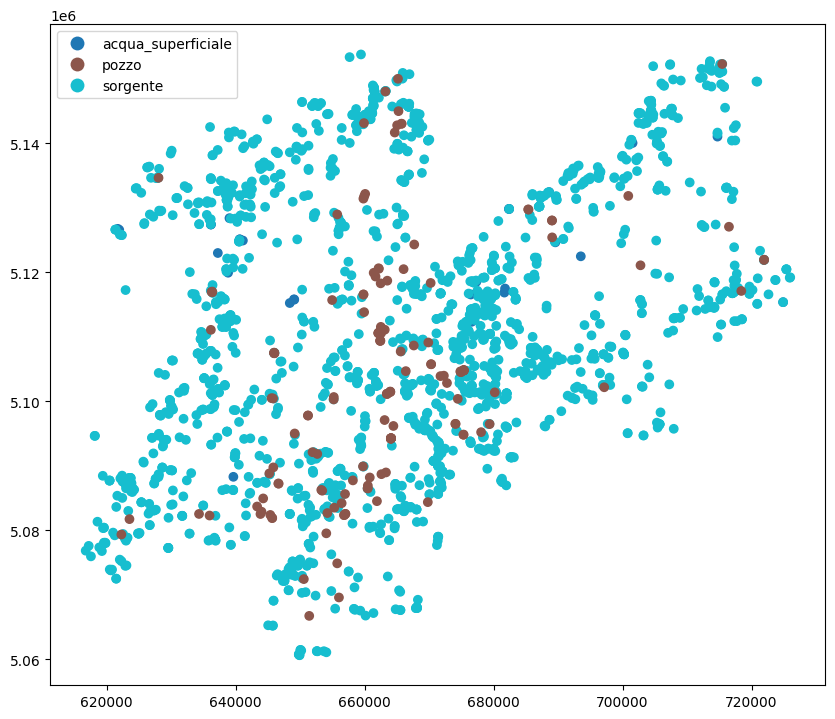

In [54]:
pup_all.plot(column='type', legend=True, figsize=(10, 10))

In [67]:
# to crs 4326
pup_all = pup_all.to_crs(epsg=4326)
# save as geojson?
pup_all.to_file('../data/water/carta_ris_idriche/pup_all.geojson', driver='GeoJSON')

# Derivazioni Idriche attive
Source: https://siat.provincia.tn.it/geonetwork/srv/ita/catalog.search#/metadata/p_TN:0ee6892f-280f-4119-924b-2c37dd71e275

In [ ]:
derivaz_url = 'https://siatservices.provincia.tn.it/idt/vector/p_TN_0ee6892f-280f-4119-924b-2c37dd71e275.zip'
fun.download_and_unzip_shapefile(derivaz_url, extract_to='../data/water/derivazioni/')

Downloaded and extracted shapefile in ../data/water/derivazioni/


In [57]:
derivaz_path = '../data/water/derivazioni/pdi_derivazioni_v.shp'
derivaz_gdf = gpd.read_file(derivaz_path)
derivaz_gdf

,classid,objectid,numero_pra,stato_istr,stato_ist1,stato_oper,stato_ope1,attingimen,prelievo,restituzio,...,origine_p1,attend_pun,attend_pu1,desc_opera,idgdi,op_gedi_da,op_gedi_d1,datafine,dataagg,geometry
0,PDI001_1,1,C/13578,3,VALIDA-SCADUTA,01,ATTIVO,SI,SI,NO,...,Carta Tecnica,CT_CTP,CTP,1,None,2007-11-09 00:00:00,2009-11-08 00:00:00,None,2024-01-17 16:00:16,MULTIPOINT (658783 5135310)
1,PDI001_2,2,C/3161,3,VALIDA-SCADUTA,01,ATTIVO,SI,NO,SI,...,Domanda,DM_COR,Corografia,1,None,2005-10-27 00:00:00,2023-12-31 00:00:00,None,2024-01-17 16:00:16,MULTIPOINT (655281 5075917)
2,PDI001_3,3,C/1141,3,VALIDA-SCADUTA,01,ATTIVO,SI,NO,SI,...,Domanda,DM_COR,Corografia,1,None,2007-09-26 00:00:00,2019-12-31 00:00:00,None,2024-01-17 16:00:16,MULTIPOINT (637257 5111918)
3,PDI001_4,4,C/8793-2,2,VALIDA,01,ATTIVO,SI,SI,NO,...,Carta Tecnica,CT_CTP,CTP,1,None,1999-01-01 00:00:00,2026-12-31 00:00:00,None,2024-01-17 16:00:16,MULTIPOINT (665427 5120465)
4,PDI001_5,5,C/10158,2,VALIDA,01,ATTIVO,SI,SI,NO,...,Carta Tecnica,CT_CAT,Catastale,1,None,1999-01-01 00:00:00,2028-12-31 00:00:00,None,2024-01-17 16:00:16,MULTIPOINT (660923 5087318)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16901,PDI001_20937,20937,C/4066,2,VALIDA,01,ATTIVO,SI,SI,NO,...,Domanda,DM_COR,Corografia,1_D_POZ,None,2021-12-14 00:00:00,2030-12-31 00:00:00,None,2024-01-17 16:00:16,MULTIPOINT (652094 5091891)
16902,PDI001_20940,20940,C/16987,2,VALIDA,01,ATTIVO,SI,SI,NO,...,Domanda,DM_CAT,Catastale,1_D_POZ_107755,None,2023-10-24 00:00:00,2042-12-31 00:00:00,None,2024-01-17 16:00:16,MULTIPOINT (647640.183 5089895.418)
16903,PDI001_20941,20941,C/16987,2,VALIDA,01,ATTIVO,SI,SI,NO,...,Domanda,DM_CAT,Catastale,1_D_POZ_107755,None,2023-10-24 00:00:00,2042-12-31 00:00:00,None,2024-01-17 16:00:16,MULTIPOINT (647640.183 5089895.418)
16904,PDI001_20942,20942,C/5262,3,VALIDA-SCADUTA,01,ATTIVO,SI,SI,NO,...,Carta Tecnica,CT_CAT,Catastale,1-D-SOR-BUSA_DEI_CAVAI_ALTA,None,2023-09-25 00:00:00,2023-12-31 00:00:00,None,2024-01-17 16:00:16,MULTIPOINT (681842 5103814)


Aiutandomi con file descrizione dati (html), ci sono diverse colonne interessanti:
- 'stato_istr', 'stato_ist1', 'stato_oper', 'stato_ope1': stato/codice istruttoria E opera
- 'data_esec', 'data_sosp' : data inizio / sospensione esercizio
- 'op_gedi_da', 'op_gedi_d1': data inizio / fine sospensione
...


In [ ]:
derivaz_gdf.columns

In [62]:
# Descrizione stato istruttoria
print(derivaz_gdf.stato_ist1.unique())
# Codice stato istruttoria
print(derivaz_gdf.stato_istr.unique())

['VALIDA-SCADUTA' 'VALIDA']
['3' '2']


In [64]:
# Descrizione stato opera
print(derivaz_gdf.stato_ope1.unique())
# Codice stato opera
print(derivaz_gdf.stato_oper.unique())

['ATTIVO' 'RICHIESTO' 'SOCCORSO/SOTTESA' 'RICHIESTO ATTIVO']
['01' '05' '04' '03']


<Axes: >

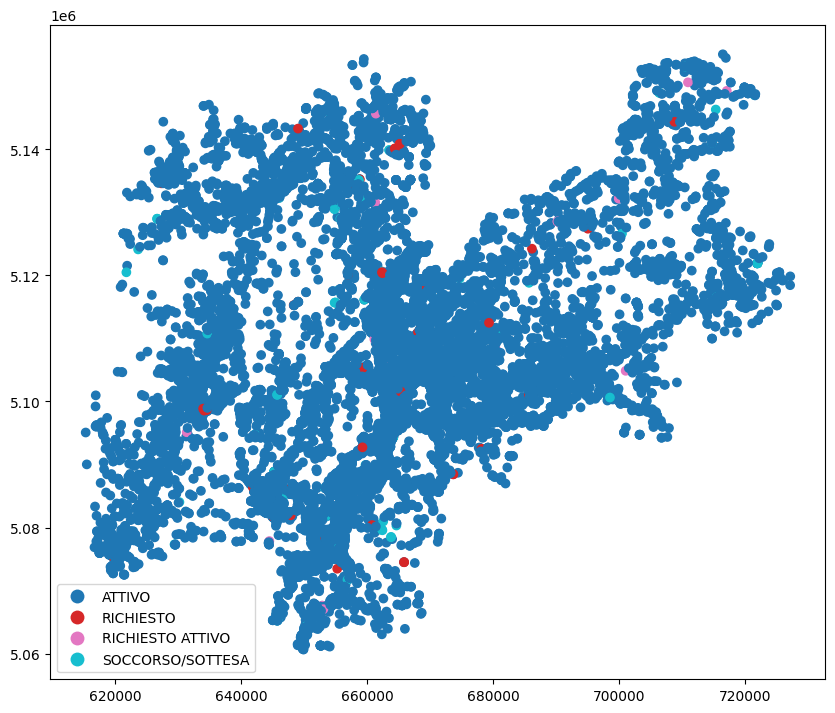

In [66]:
derivaz_gdf.plot(column='stato_ope1', legend=True, figsize=(10, 10))

In [68]:
derivaz_gdf = derivaz_gdf.to_crs(epsg=4326)
derivaz_gdf.to_file('../data/water/derivazioni/derivaz.geojson', driver='GeoJSON')